In [1]:
# Importation des libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

In [2]:
data_dir = pathlib.Path('C:/Users/SANTI/Downloads/Virtual_Environments/python/Projet3_streamlit/Radiographies')
print(data_dir)

C:\Users\SANTI\Downloads\Virtual_Environments\python\Projet3_streamlit\Radiographies


In [3]:
# Batching des images
batch_size = 4
image_heigth = 200
image_width = 200

In [4]:
# Preprocessing des images
train_data = ImageDataGenerator(
    rescale=1./255,           # Normalisation des pixels [0,1]
    validation_split=0.2,     # 20% des données pour la validation
    rotation_range=15,        # rotation aléatoire
    zoom_range=0.1,           
    horizontal_flip=True,     
    fill_mode='nearest'       # remplissage des pixels vides
)

In [5]:
# Générateur d’images pour l’entraînement
train_data_gen = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(image_heigth, image_width),
    batch_size=batch_size
)

Found 51 files belonging to 2 classes.
Using 41 files for training.


In [6]:
# Construction du jeu de validation
val_data_gen = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(image_heigth, image_width),
    batch_size=batch_size
)

Found 51 files belonging to 2 classes.
Using 10 files for validation.


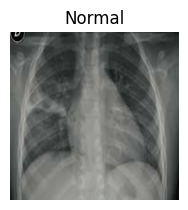

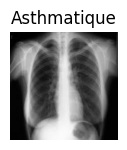

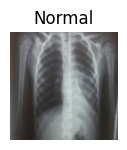

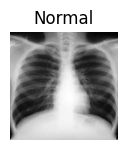

In [7]:
import matplotlib.pyplot as plt

# Affichage d'un batch d'images prétraitées
plt.figure(figsize=(10,10))
for images, labels in train_data_gen.take(1):
    for i in range(4):
        ax = plt.subplot(1,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Asthmatique' if labels[i]==1 else 'Normal')
        plt.axis('off')
        plt.show()

In [8]:
from tensorflow.keras import layers

In [9]:
num_classes = 2  # Asthmatique et Normal

In [10]:
# Structuration du modèle
deep_model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [11]:
# Compilation du modèle
deep_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, write_images=logdir, embeddings_data=train_data)

In [13]:
# Training du modèle
deep_model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=20,
    callbacks=[tensorboard_callback]
)

Epoch 1/20


c:\Users\SANTI\Downloads\Virtual_Environments\python\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




11/11 [==============================] - 8s 415ms/step - loss: 0.9777 - accuracy: 0.5366 - val_loss: 0.6506 - val_accuracy: 0.7000
Epoch 2/20
11/11 [==============================] - 3s 229ms/step - loss: 0.6598 - accuracy: 0.6341 - val_loss: 0.6176 - val_accuracy: 0.7000
Epoch 3/20
11/11 [==============================] - 3s 233ms/step - loss: 0.6456 - accuracy: 0.6341 - val_loss: 0.6425 - val_accuracy: 0.7000
Epoch 4/20
11/11 [==============================] - 3s 249ms/step - loss: 0.6593 - accuracy: 0.6341 - val_loss: 0.6218 - val_accuracy: 0.7000
Epoch 5/20
11/11 [==============================] - 4s 331ms/step - loss: 0.6549 - accuracy: 0.6341 - val_loss: 0.6137 - val_accuracy: 0.7000
Epoch 6/20
11/11 [==============================] - 3s 294ms/step - loss: 0.6248 - accuracy: 0.6341 - val_loss: 0.5802 - val_accuracy: 0.7000
Epoch 7/20
11/11 [==============================] - 3s 247ms/step - loss: 0.6559 - accuracy: 0.6341 - val_loss: 0.6086 - val_accuracy: 0.7000
Epoch 8/20
11/1

In [14]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        3

In [15]:
# Sauvegarde du modèle sous le format H5
deep_model.save('deep_asthma.h5')

c:\Users\SANTI\Downloads\Virtual_Environments\python\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
